In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [18]:
url = "https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv"
dataset_train = pd.read_csv(url)
training_set = dataset_train.iloc[:, 1:2].values

In [19]:
dataset_train.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [20]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled

array([[0.6202352 ],
       [0.62226277],
       [0.64436334],
       ...,
       [0.16504461],
       [0.15896188],
       [0.16626115]])

In [21]:
X_train = []
y_train = []

for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [22]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

In [23]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=1, batch_size=32)

62/62 [==============================] - 6s 40ms/step - loss: 0.0120


In [24]:
url = "https://raw.githubusercontent.com/mwitiderrick/stockprice/master/tatatest.csv"
dataset_test = pd.read_csv(url)
real_stock_prize =  dataset_test.iloc[:, 1:2].values

In [25]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)

inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predict_stock_prize = model.predict(X_test)
predict_stock_prize = sc.inverse_transform(predict_stock_prize)

1/1 [==============================] - 1s 796ms/step


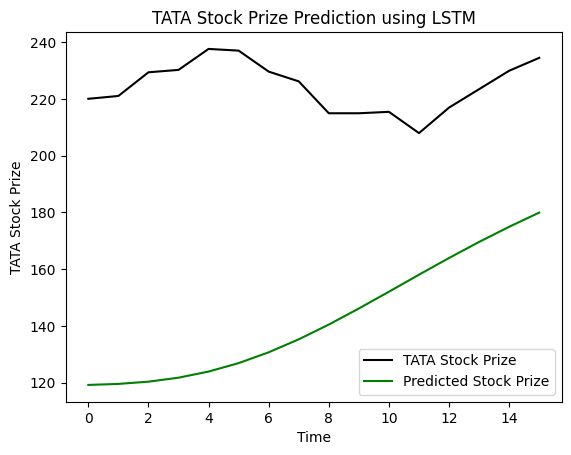

In [26]:
plt.plot(real_stock_prize, color='black', label="TATA Stock Prize")
plt.plot(predict_stock_prize, color='green', label="Predicted Stock Prize")

plt.title("TATA Stock Prize Prediction using LSTM")
plt.xlabel("Time")
plt.ylabel("TATA Stock Prize")
plt.legend()
plt.show()

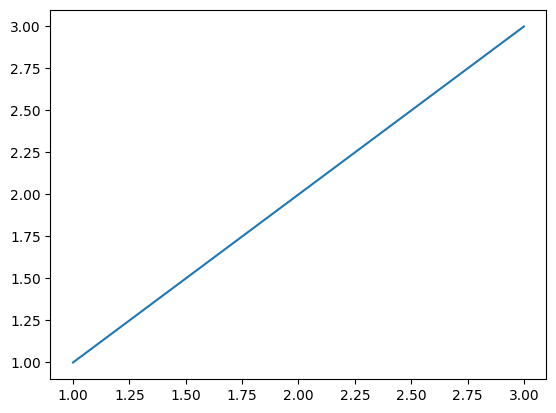

In [29]:
import matplotlib.pyplot  as plt
plt.plot([1, 2, 3], [1, 2, 3])